   patient_id date_of_birth medical_condition co_morbidity  \
0           6    30/01/1990        POSTPARTUM     diabetes   
1           7    22/10/1986        POSTPARTUM      obesity   
2           8        5/7/82         PREGNANCY      obesity   
3           9       6/12/83         PREGNANCY          NaN   
4          13    16/03/1996        POSTPARTUM      obesity   

             ethnicity risk_factor         lmp  cycle_length         edd  \
0                Mixed         LOW      1/6/22            28      8/3/23   
1   Non Hispanic White         LOW  13/07/2021            28  19/04/2022   
2  Hispanic and Latino      MEDIUM  23/07/2021            28  29/04/2022   
3   Non Hispanic White         LOW  20/10/2021            28  27/07/2022   
4  Hispanic and Latino      MEDIUM  30/09/2021            28      7/7/22   

   number_of_babies  ... past_medical_history_11 pastPregnancy_Para  \
0                 1  ...                     NaN                1.0   
1                 1  ...    

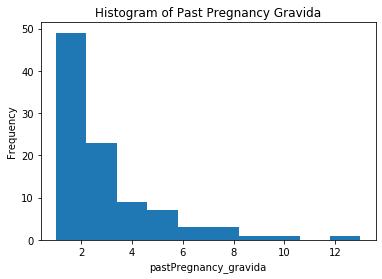

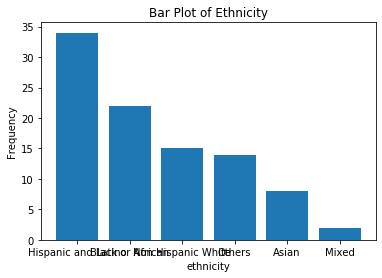

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('C:/Users/srikar/Downloads/basic_updated.csv')

# Preview the data
print(df.head())

# Check the shape of the data
print(df.shape)

# Check for null values
print(df.isnull().sum())

# Check the data types
print(df.dtypes)

# Check the descriptive statistics of the numerical variables
print(df.describe())

# Create a histogram of a numerical variable
plt.hist(df['pastPregnancy_gravida'])
plt.xlabel('pastPregnancy_gravida')
plt.ylabel('Frequency')
plt.title('Histogram of Past Pregnancy Gravida')
plt.show()


# Create a bar plot of a categorical variable
plt.bar(df['ethnicity'].value_counts().index, df['ethnicity'].value_counts().values)
plt.xlabel('ethnicity')
plt.ylabel('Frequency')
plt.title('Bar Plot of Ethnicity') 
plt.show()

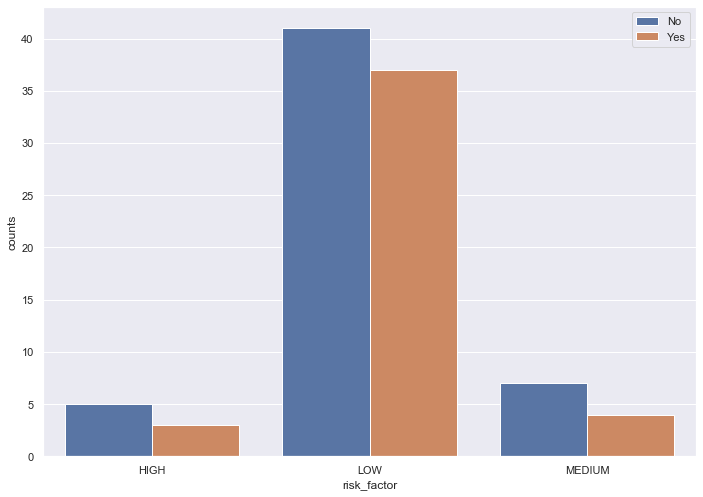

In [32]:
counts = df.groupby(['risk_factor', 'pastPregnancy_has risk']).size().reset_index(name='counts')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='risk_factor', y='counts', hue='pastPregnancy_has risk', data=counts)
plt.legend(loc='upper right')

In [33]:

# One-hot encode the categorical column(s) in the dataframe
df_encoded = pd.get_dummies(df, columns=['medical_condition','co_morbidity','ethnicity','number_of_babies','other checks','infection_history','infection_history_1','past_medical_history','past_medical_history_1','past_medical_history_2','past_medical_history_3','past_medical_history_4','past_medical_history_5','past_medical_history_6','past_medical_history_7','past_medical_history_8','past_medical_history_9','past_medical_history_10','past_medical_history_11'])

# Write the encoded dataframe to a new CSV file
df_encoded.to_csv('C:/Users/srikar/Downloads/outputsr.csv', index=False)

print(df.dtypes)

patient_id                         int64
date_of_birth                     object
medical_condition                 object
co_morbidity                      object
ethnicity                         object
risk_factor                       object
lmp                               object
cycle_length                       int64
edd                               object
number_of_babies                   int64
other checks                      object
infection_history                 object
infection_history_1               object
past_medical_history              object
past_medical_history_1            object
past_medical_history_2            object
past_medical_history_3            object
past_medical_history_4            object
past_medical_history_5            object
past_medical_history_6            object
past_medical_history_7            object
past_medical_history_8            object
past_medical_history_9            object
past_medical_history_10           object
past_medical_his

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the data from a CSV file into a pandas dataframe
df = pd.read_csv('C:/Users/srikar/Downloads/outputsr.csv')
df=df.drop('date_of_birth',axis=1)
df=df.drop('edd',axis=1)
df=df.drop('lmp',axis=1)
print(df)

    patient_id risk_factor  cycle_length  pastPregnancy_Para  \
0            6         LOW            28                 1.0   
1            7         LOW            28                 3.0   
2            8      MEDIUM            28                 0.0   
3            9         LOW            28                 0.0   
4           13      MEDIUM            28                 1.0   
..         ...         ...           ...                 ...   
92         196         LOW            28                 1.0   
93         197         LOW            28                 1.0   
94         208         LOW            28                 1.0   
95         210         LOW            28                 2.0   
96         211         LOW            28                 NaN   

    pastPregnancy_living  pastPregnancy_gravida  pastPregnancy_ectopics  \
0                    1.0                      1                     NaN   
1                    3.0                      4                     NaN   
2     

In [35]:
from sklearn.preprocessing import LabelEncoder


# Select the categorical column(s) to encode
cat_cols = ['pastPregnancy_has risk']

# Create a LabelEncoder object and fit it to the categorical data
le = LabelEncoder()
df[cat_cols] = le.fit_transform(df[cat_cols])
print(df)
cat_cols = ['risk_factor']

# Create a LabelEncoder object and fit it to the categorical data
le = LabelEncoder()
df[cat_cols] = le.fit_transform(df[cat_cols])
print(df)




    patient_id risk_factor  cycle_length  pastPregnancy_Para  \
0            6         LOW            28                 1.0   
1            7         LOW            28                 3.0   
2            8      MEDIUM            28                 0.0   
3            9         LOW            28                 0.0   
4           13      MEDIUM            28                 1.0   
..         ...         ...           ...                 ...   
92         196         LOW            28                 1.0   
93         197         LOW            28                 1.0   
94         208         LOW            28                 1.0   
95         210         LOW            28                 2.0   
96         211         LOW            28                 NaN   

    pastPregnancy_living  pastPregnancy_gravida  pastPregnancy_ectopics  \
0                    1.0                      1                     NaN   
1                    3.0                      4                     NaN   
2     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
## null Values
df.fillna(0, inplace=True)
print(df)



    patient_id  risk_factor  cycle_length  pastPregnancy_Para  \
0            6            1            28                 1.0   
1            7            1            28                 3.0   
2            8            2            28                 0.0   
3            9            1            28                 0.0   
4           13            2            28                 1.0   
..         ...          ...           ...                 ...   
92         196            1            28                 1.0   
93         197            1            28                 1.0   
94         208            1            28                 1.0   
95         210            1            28                 2.0   
96         211            1            28                 0.0   

    pastPregnancy_living  pastPregnancy_gravida  pastPregnancy_ectopics  \
0                    1.0                      1                     0.0   
1                    3.0                      4                     0

ValueError: num must be 1 <= num <= 66, not 67

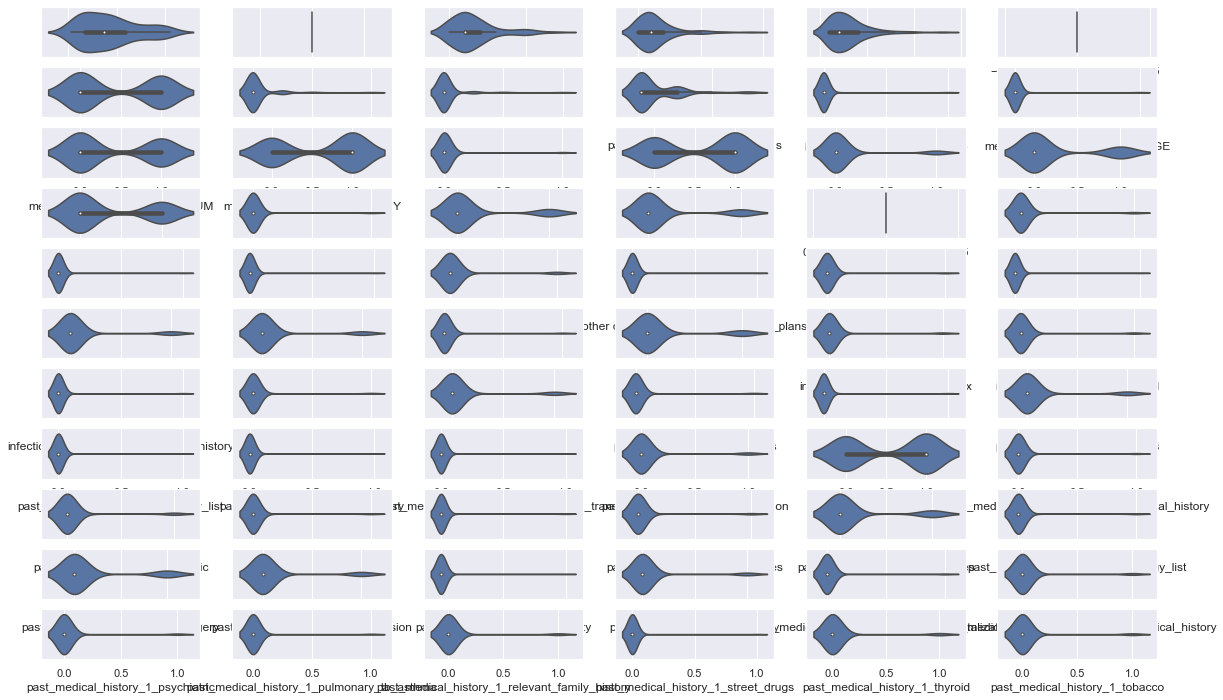

In [37]:
import seaborn as sns
cols = [i for i in df.columns]
cols = [i for i in cols if i not in ['risk_factor']]
plt.figure(figsize=(20,12))
for i in enumerate(cols): 
    num = i[0]+1
    plt.subplot(11,6,num)
    sns.violinplot(data=df, x=i[1])
plt.show()


In [ ]:
Logistic regression using K Fold followed by Log.reg

Highest Logistic Regression accuracy :- 0.95

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Define the features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=44)

# Initialize the logistic regression classifier
clf = LogisticRegression(multi_class='ovr')

# Initialize an empty list to store the accuracy scores for each fold
scores = []

# Iterate over each fold and train the classifier
for train_index, test_index in kf.split(X):
    # Get the training and testing data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Compute the accuracy score for this fold
    score = accuracy_score(y_test, y_pred)

    # Append the score to the list of scores
    scores.append(score)

# Compute the average accuracy score across all folds
avg_score = np.mean(scores)

print(f'Average accuracy score: {avg_score}')


Average accuracy score: 0.8352631578947369


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [39]:
from sklearn.metrics import roc_curve, auc
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_factor', axis=1), df['risk_factor'], test_size=0.2)

# Create a logistic regression model and fit it to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

#linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
#print(linear_result)

y_prob = lr.predict_proba(X_test)[:, 1]

# Calculating the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Logistic Regression Accuracy: 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: multiclass format is not supported

In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Print accuracy score for each fold and average accuracy
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")
print(f"Average accuracy: {scores.mean()}")

# Fit the model on the entire dataset
model.fit(X, y)

# Predict target variable for new data
y_pred = model.predict(X)

# Print accuracy score on the entire dataset
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on entire dataset: {accuracy}")



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Fold 1: 0.8
Fold 2: 0.8
Fold 3: 0.8
Fold 4: 0.7
Fold 5: 0.7
Fold 6: 0.8
Fold 7: 0.9
Fold 8: 0.8888888888888888
Fold 9: 0.7777777777777778
Fold 10: 0.8888888888888888
Average accuracy: 0.8055555555555556
Accuracy on entire dataset: 0.9278350515463918


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_factor', axis=1), df['risk_factor'], test_size=0.2, random_state=40)


# Train a logistic regression model
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train)


# Initialize your logistic regression model
logreg = LogisticRegression()

# Fit your logistic regression model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data using your logistic regression model
y_pred = logreg.predict(X_test)

# Print the classification report for your model
print(classification_report(y_test, y_pred))

#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00         2

    accuracy                           0.95        20
   macro avg       0.65      0.67      0.66        20
weighted avg       0.90      0.95      0.93        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: multiclass format is not supported

In [8]:
Decision tree model

Decision Tree Accuracy: 0.8

SyntaxError: invalid syntax (<ipython-input-8-2097917344bd>, line 1)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd


# Define the features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Define the number of folds for cross-validation
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Compute the cross-validation scores
scores = cross_val_score(clf, X, y, cv=kf)

# Print the cross-validation scores and the mean and standard deviation
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {np.mean(scores)}')
print(f'Standard deviation of cross-validation scores: {np.std(scores)}')


Cross-validation scores: [0.8        0.75       0.63157895 0.84210526 0.68421053]
Mean cross-validation score: 0.741578947368421
Standard deviation of cross-validation scores: 0.07613226571997257


In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Decision Tree Accuracy: 0.75


NameError: name 'test' is not defined

In [13]:
Model Tuning for KNN using K Fold followed by KNN
KNN  Highest accuracy - 0.8947368421052632

SyntaxError: invalid syntax (<ipython-input-13-36c9fca21848>, line 1)

In [24]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Define the features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Define the number of folds for cross-validation
k = 5

# Initialize the KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Initialize the k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores for each fold
accuracy_scores = []

# Loop over the folds
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Predict the target variable for the testing data
    y_pred = clf.predict(X_test)
    
    # Compute the accuracy score for this fold and append it to the list
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Compute the mean and standard deviation of the accuracy scores across all folds
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the mean and standard deviation of the accuracy scores
print(f'Mean accuracy: {mean_accuracy}')
print(f'Standard deviation of accuracy: {std_accuracy}')


Mean accuracy: 0.8152631578947368
Standard deviation of accuracy: 0.09532565556773412


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

KNN Accuracy: 0.8947368421052632


NameError: name 'test' is not defined

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_factor', axis=1), df['risk_factor'], test_size=0.2, random_state=40)

# define parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # number of neighbors to consider
    'weights': ['uniform', 'distance'],  # weighting strategy
    'p': [1, 2]  # distance metric (1 = Manhattan distance, 2 = Euclidean distance)
}

# create KNN classifier object
knn = KNeighborsClassifier()

# use grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# fit the KNN classifier on the training data with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], p=best_params['p'])
knn.fit(X_train, y_train)

# predict on the test data and calculate accuracy score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters, score, and accuracy
print('Best hyperparameters:', best_params)
print('Best score:', best_score)
print('Accuracy:', accuracy)


Best hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best score: 0.8181818181818182
Accuracy: 0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
SVM using K fold followed by SVM model

Highest accuracy for SVM:-  0.85

SyntaxError: invalid syntax (<ipython-input-17-00ad90c4f703>, line 1)

In [27]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


# Define the features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Initialize the SVM classifier
clf = SVC(kernel='linear')

# Define the number of folds for k-fold cross-validation
n_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict the target variable on the testing data
    y_pred = clf.predict(X_test)

    # Compute the accuracy score for this fold
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Compute the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the mean and standard deviation of the accuracy scores
print(f'Mean accuracy: {mean_accuracy:.3f}')
print(f'Standard deviation of accuracy: {std_accuracy:.3f}')


Mean accuracy: 0.742
Standard deviation of accuracy: 0.046


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_factor', axis=1), df['risk_factor'], test_size=0.2, random_state=45)

# define parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],  # regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # kernel function
    'gamma': ['scale', 'auto']  # kernel coefficient (if applicable)
}

# create SVM classifier object
svm = SVC()

# use grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# fit the SVM classifier on the training data with the best hyperparameters
svm = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
svm.fit(X_train, y_train)

# predict on the test data and calculate accuracy score
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters, score, and accuracy
print('Best hyperparameters:', best_params)
print('Best score:', best_score)
print('Accuracy:', accuracy)


Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8311688311688312
Accuracy: 0.85


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_factor', axis=1), df['risk_factor'], test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a OneVsRestClassifier instance to perform one-vs-all classification
ovr = OneVsRestClassifier(clf)

# Train the classifier on the training data
ovr.fit(X_train, y_train)

# Predict the probabilities for each class on the test data
y_prob = ovr.predict_proba(X_test)

# Compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:353: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').